In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
theme_set(theme_bw())


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
pf <- read.csv('pseudo_facebook.tsv', sep = '\t')
head(pf)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0


### Third Qualitative Variable

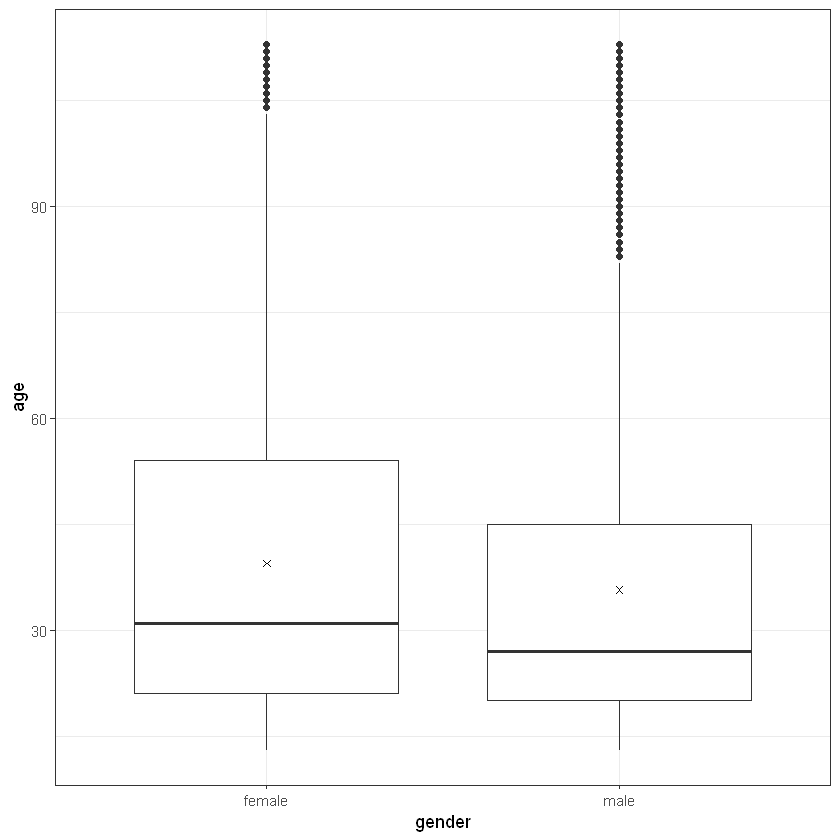

In [3]:
ggplot(aes( x = gender, y = age), data = subset(pf, !is.na(gender))) + geom_boxplot() + stat_summary(fun.y = mean, geom = 'point', shape = 4)

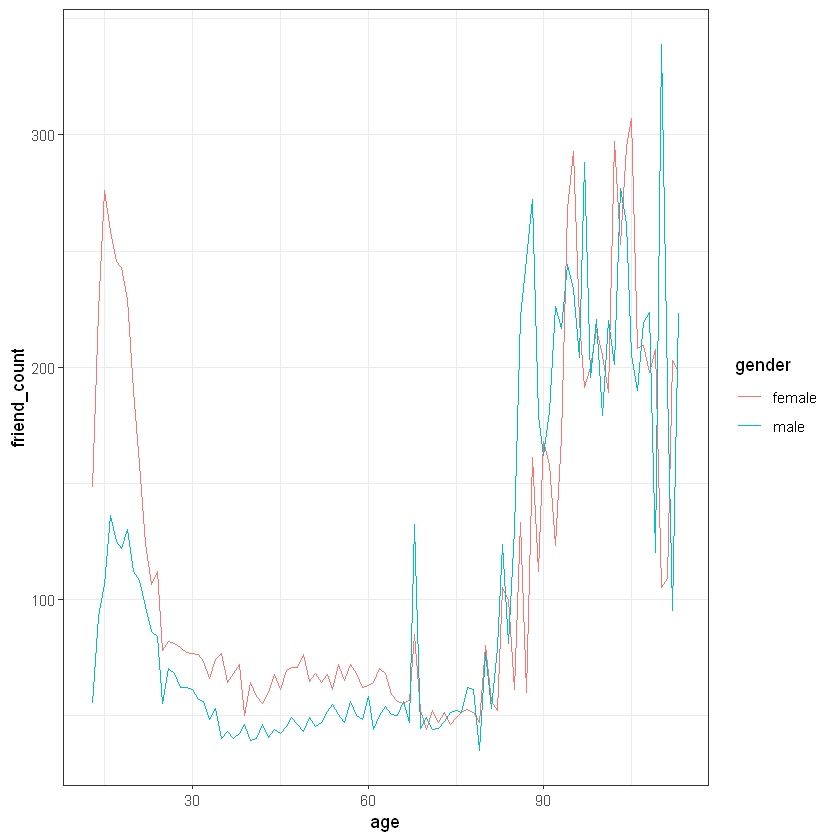

In [4]:
ggplot(aes(x = age, y = friend_count), data = subset(pf, !is.na(gender))) + geom_line(aes(color = gender), stat = 'summary', fun.y = median)

In [5]:
# Chain functions together
pf.fc_by_age_gender <- pf %>%
    filter(!is.na(gender)) %>%
    group_by(age, gender) %>%
    summarise(mean_friend_count = mean(friend_count),
              median_friend_count = median(friend_count),
              n = n()) %>%
    ungroup() %>%
    arrange(age)

In [6]:
head(pf.fc_by_age_gender)

age,gender,mean_friend_count,median_friend_count,n
13,female,259.1606,148.0,193
13,male,102.1340,55.0,291
14,female,362.4286,224.0,847
14,male,164.1456,92.5,1078
15,female,538.6813,276.0,1139
15,male,200.6658,106.5,1478


### Plotting Conditional Summaries

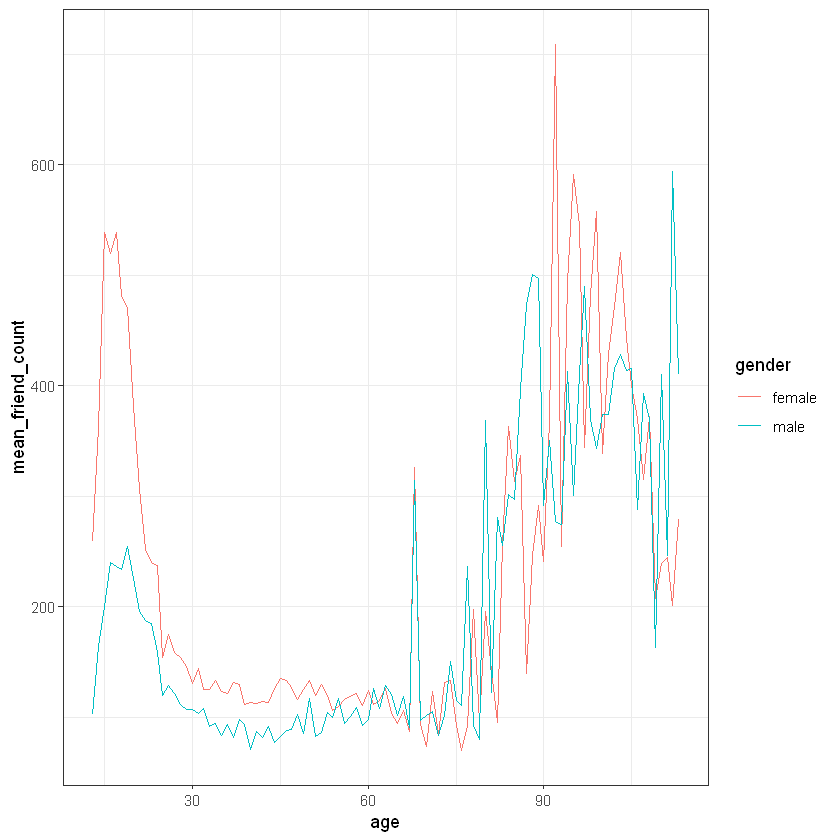

In [7]:
ggplot(aes(x = age, y = mean_friend_count), data = pf.fc_by_age_gender) +
  geom_line(aes(color = gender), stat = 'summary', fun.y = median)

### Thinking in Ratios / Wide and Long Format

How many time more friends those the average user have that the male user?

In [8]:
## Reshape Data
## Now data is on a long range format we are going to convert it to a wide range format by making a new dataframe with one row for each age and then put the median count
## inside male and female.

### Reshaping Data

In [9]:
pf.fc_by_age_gender.wide <- dcast(pf.fc_by_age_gender,
                                  age ~ gender,
                                  value.var = 'median_friend_count')

In [10]:
head(pf.fc_by_age_gender.wide)

age,female,male
13,148.0,55.0
14,224.0,92.5
15,276.0,106.5
16,258.5,136.0
17,245.5,125.0
18,243.0,122.0


### Ratio Plot

In [11]:
## Find the ratio of female to male. How many time more friends the average female user have compare to actual number of friend the actual male user have?

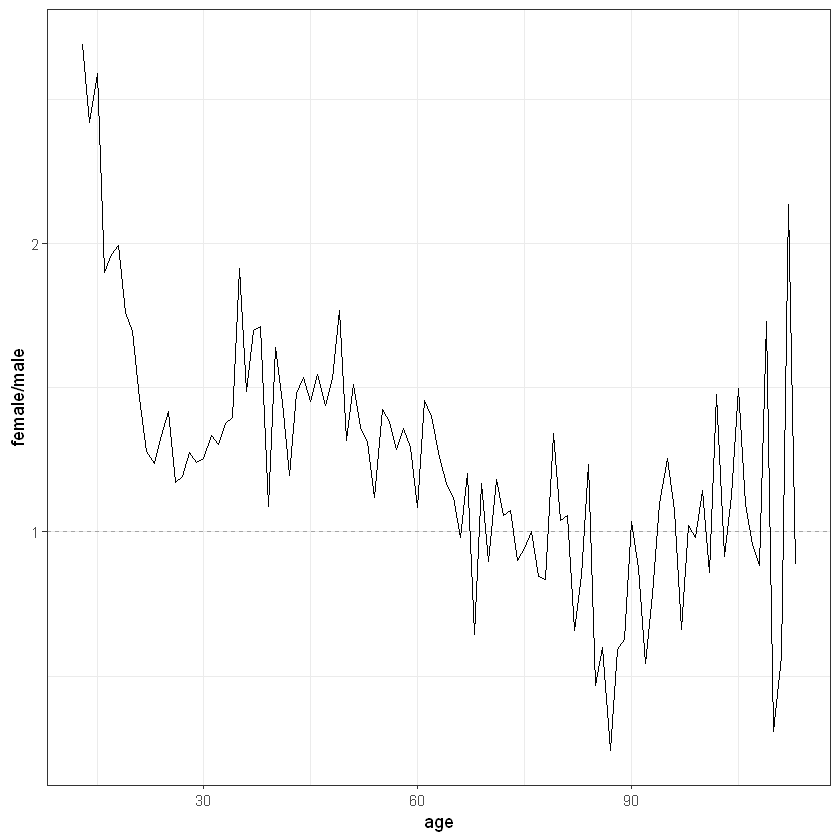

In [12]:
ggplot(aes(x = age, y = female / male), # ratio
       data = pf.fc_by_age_gender.wide) +
    geom_line() +
    geom_hline(yintercept = 1, alpha = 0.3, linetype = 2)

### Third Quantitative Variable

In [13]:
## Create a variable called year_joined in the pf data frame using the variable tenure and 2014 as the reference year.
# The variable year joined should contain the year that a user joined facebook.

pf$year_joined <- floor(2014 - pf$tenure/365)
head(pf)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,2013
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,2013
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,2013
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,2013
1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,2013
1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0,2013


### Cut a variable

In [14]:
summary(pf$year_joined)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2005    2012    2012    2012    2013    2014       2 

In [15]:
table(pf$year_joined)


 2005  2006  2007  2008  2009  2010  2011  2012  2013  2014 
    9    15   581  1507  4557  5448  9860 33366 43588    70 

In [16]:
?cut

cut {base},R Documentation
x,a numeric vector which is to be converted to a factor by cutting.
breaks,either a numeric vector of two or more unique cut points or a single number (greater than or equal to 2) giving the number of intervals into which x is to be cut.
labels,"labels for the levels of the resulting category. By default, labels are constructed using ""(a,b]"" interval notation. If labels = FALSE, simple integer codes are returned instead of a factor."
include.lowest,"logical, indicating if an ‘x[i]’ equal to the lowest (or highest, for right = FALSE) ‘breaks’ value should be included."
right,"logical, indicating if the intervals should be closed on the right (and open on the left) or vice versa."
dig.lab,integer which is used when labels are not given. It determines the number of digits used in formatting the break numbers.
ordered_result,logical: should the result be an ordered factor?
...,further arguments passed to or from other methods.


In [17]:
## Create a new variable in the data frame called year_joined.bucket by using the cut function on the variable year_joined.
## You need to create the following buckets for the new variable, year_joined.bucket

#        (2004, 2009]
#        (2009, 2011]
#        (2011, 2012]
#        (2012, 2014]

pf$year_joined.bucket <- cut(pf$year_joined, c(2004, 2009, 2011, 2012, 2014))
head(pf)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined,year_joined.bucket
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,2013,"(2012,2014]"
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,2013,"(2012,2014]"
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,2013,"(2012,2014]"
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,2013,"(2012,2014]"
1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,2013,"(2012,2014]"
1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0,2013,"(2012,2014]"


### Plotting It All Together

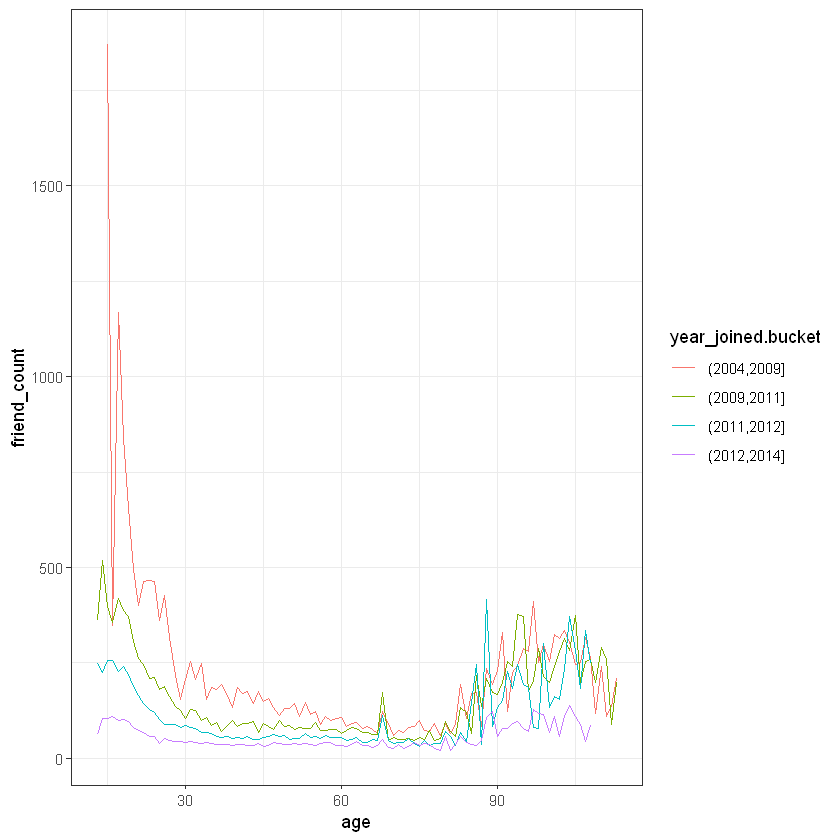

In [18]:
##  Create a line graph of friend_count vs. age so that each year_joined.bucket is a line tracking the median user friend_count across
## age. This means you should have four different lines on your plot.

## You should subset the data to exclude the users whose year_joined.bucket is NA.

ggplot(aes(x = age, y = friend_count),
       data = subset(pf, !is.na(year_joined.bucket))) +
  geom_line(aes(color = year_joined.bucket), stat = 'summary', fun.y = median)

### Plot the Grand Mean

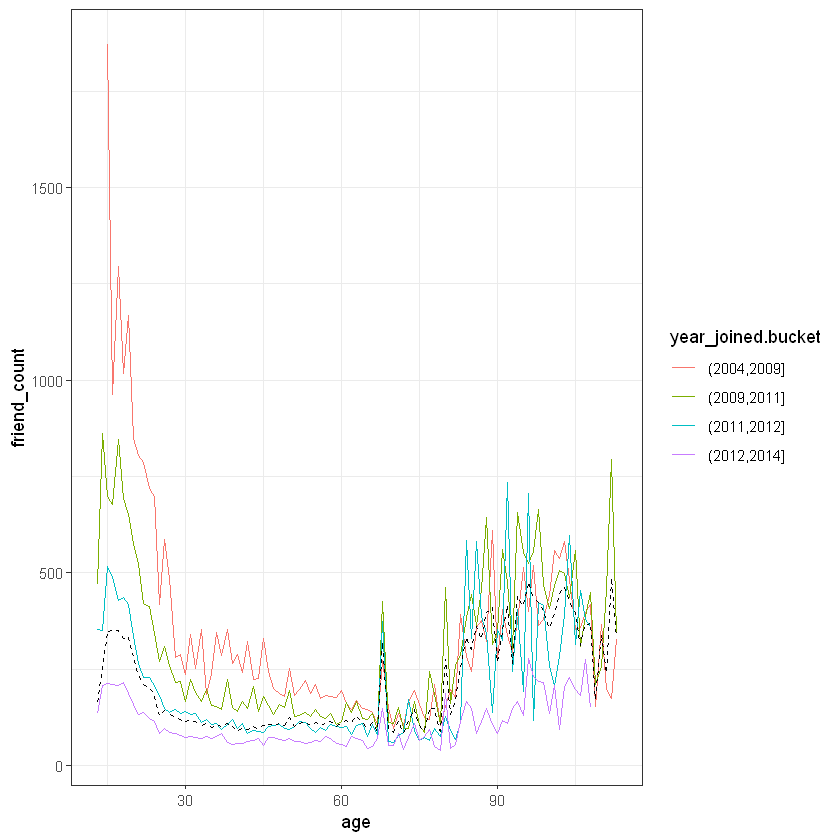

In [19]:
# Write code to do the following:

# (1) Add another geom_line to code below
# to plot the grand mean of the friend count vs age.

# (2) Exclude any users whose year_joined.bucket is NA.

# (3) Use a different line type for the grand mean.

# As a reminder, the parameter linetype can take the values 0-6:

# 0 = blank, 1 = solid, 2 = dashed
# 3 = dotted, 4 = dotdash, 5 = longdash
# 6 = twodash

ggplot(aes(x = age, y = friend_count),
       data = subset(pf, !is.na(year_joined.bucket))) +
  geom_line(aes(color = year_joined.bucket), stat = 'summary', fun.y = mean) +
  geom_line(stat = 'summary', fun.y = mean, linetype = 2)

### Friending Rate

In [20]:
# What is the median friend rate?
# What is the maximum friend rate?

with(subset(pf, tenure >= 1), summary(friend_count / tenure))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0775   0.2205   0.6096   0.5658 417.0000 

### Friendships Initiated

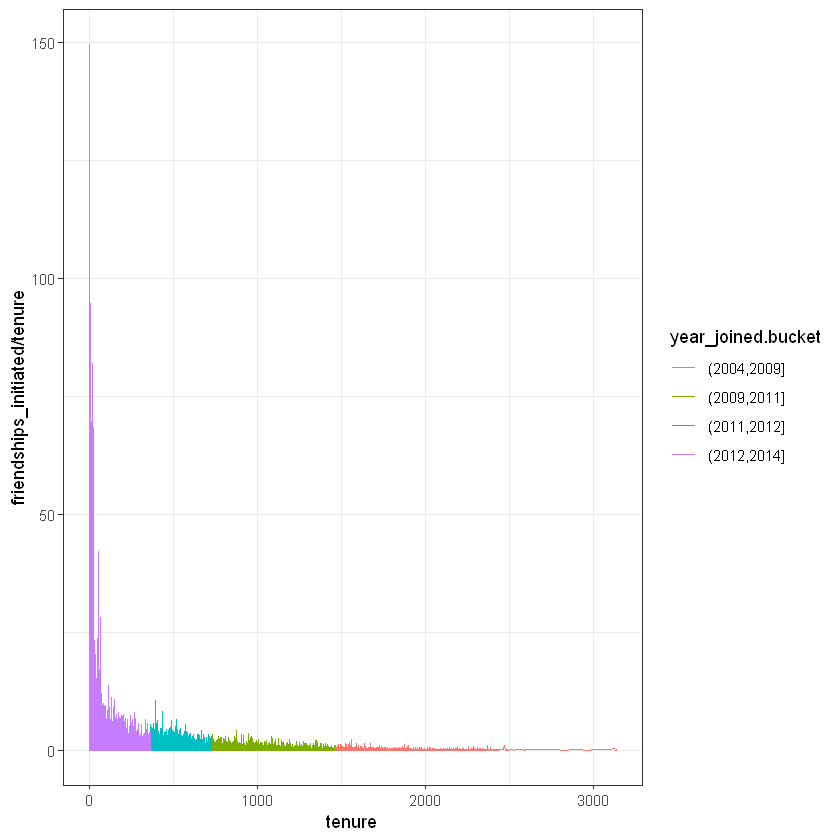

In [21]:
# Create a line graph of mean of friendships_initiated per day (of tenure)
# vs. tenure colored by year_joined.bucket.

# You need to make use of the variables tenure,
# friendships_initiated, and year_joined.bucket.

# You also need to subset the data to only consider user with at least
# one day of tenure.

ggplot(aes(x = tenure, y = friendships_initiated / tenure),
       data = subset(pf, tenure >=1)) +
    geom_line(aes(color = year_joined.bucket))

### Bias Variance Trade off Revisited

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


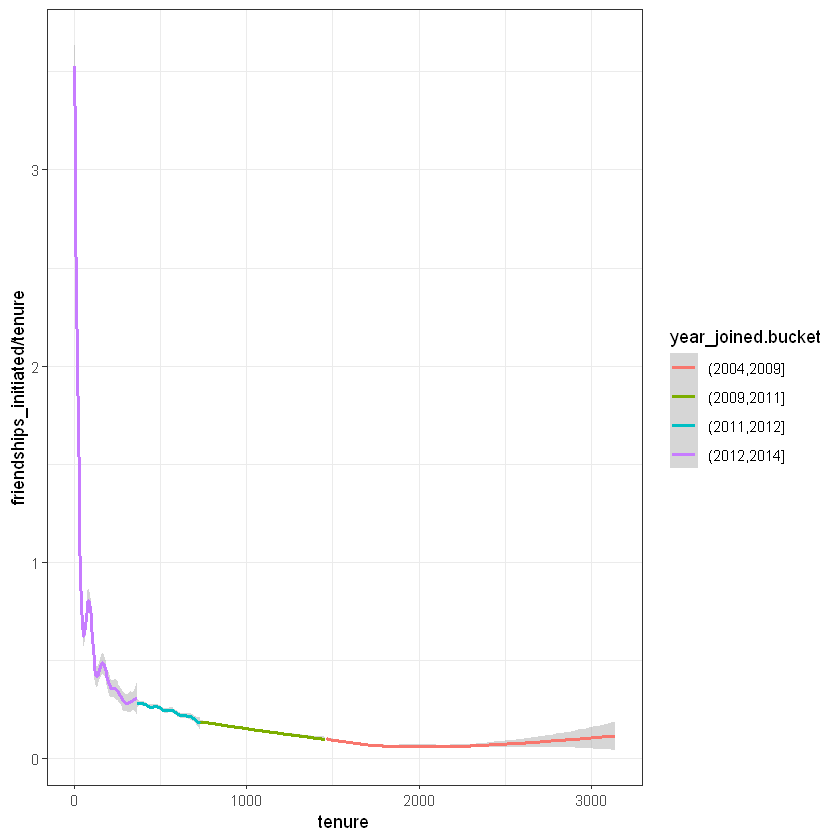

In [22]:
ggplot(aes(x = tenure, y = friendships_initiated / tenure),
       data = subset(pf, tenure >=1)) +
    geom_smooth(aes(color = year_joined.bucket))

### Introducing the Yogurt Dataset

In [23]:
yo <- read.csv('yogurt.csv')

In [24]:
str(yo)

'data.frame':	2380 obs. of  9 variables:
 $ obs        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id         : int  2100081 2100081 2100081 2100081 2100081 2100081 2100081 2100081 2100081 2100081 ...
 $ time       : int  9678 9697 9825 9999 10015 10029 10036 10042 10083 10091 ...
 $ strawberry : int  0 0 0 0 1 1 0 0 0 0 ...
 $ blueberry  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pina.colada: int  0 0 0 0 1 2 0 0 0 0 ...
 $ plain      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mixed.berry: int  1 1 1 1 1 1 1 1 1 1 ...
 $ price      : num  59 59 65 65 49 ...


In [25]:
# Change the id from an int to a factor
yo$id <- factor(yo$id)

In [26]:
str(yo$id)

 Factor w/ 332 levels "2100081","2100370",..: 1 1 1 1 1 1 1 1 1 1 ...


### Histograms Revisited

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


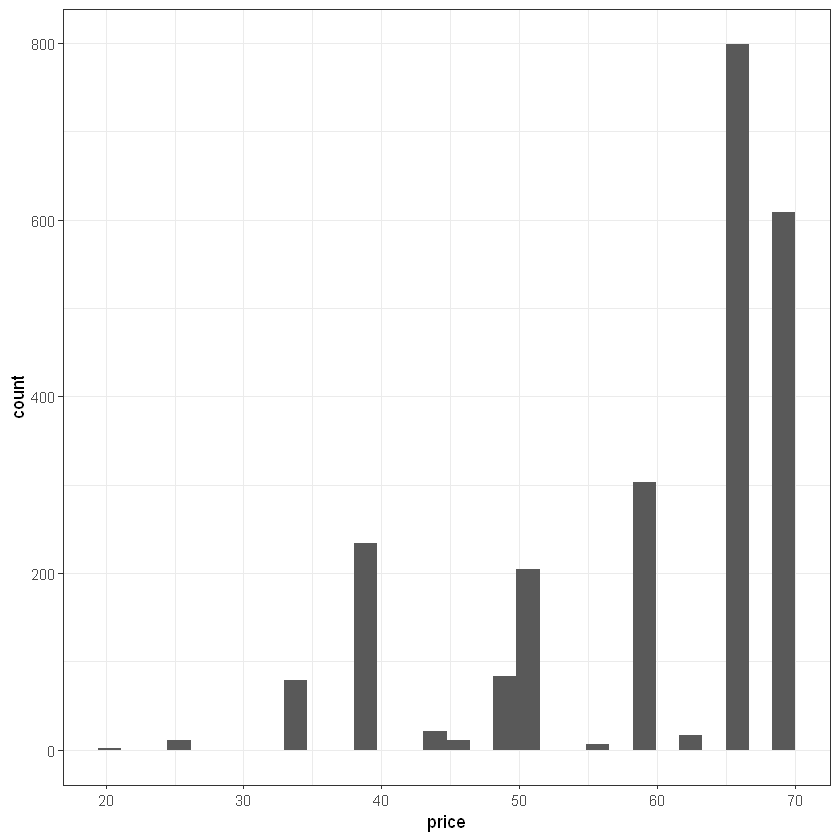

In [27]:
ggplot(aes(x = price), data = yo, fill = 'lightblue', binwith = 30) + geom_histogram()

### Number of Purchases

In [28]:
# Create a new variable called all.purchases,
# which gives the total counts of yogurt for
# each observation or household.

# One way to do this is using the transform
# function. You can look up the function transform
# and run the examples of code at the bottom of the
# documentation to figure out what it does.

# The transform function produces a data frame
# so if you use it then save the result to 'yo'!

# OR you can figure out another way to create the
# variable.

yo <- transform(yo, all.purchases = strawberry + blueberry + pina.colada + plain + mixed.berry)

In [29]:
head(yo)

obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price,all.purchases
1,2100081,9678,0,0,0,0,1,58.96,1
2,2100081,9697,0,0,0,0,1,58.96,1
3,2100081,9825,0,0,0,0,1,65.04,1
4,2100081,9999,0,0,0,0,1,65.04,1
5,2100081,10015,1,0,1,0,1,48.96,3
6,2100081,10029,1,0,2,0,1,65.04,4


### Prices Over Time

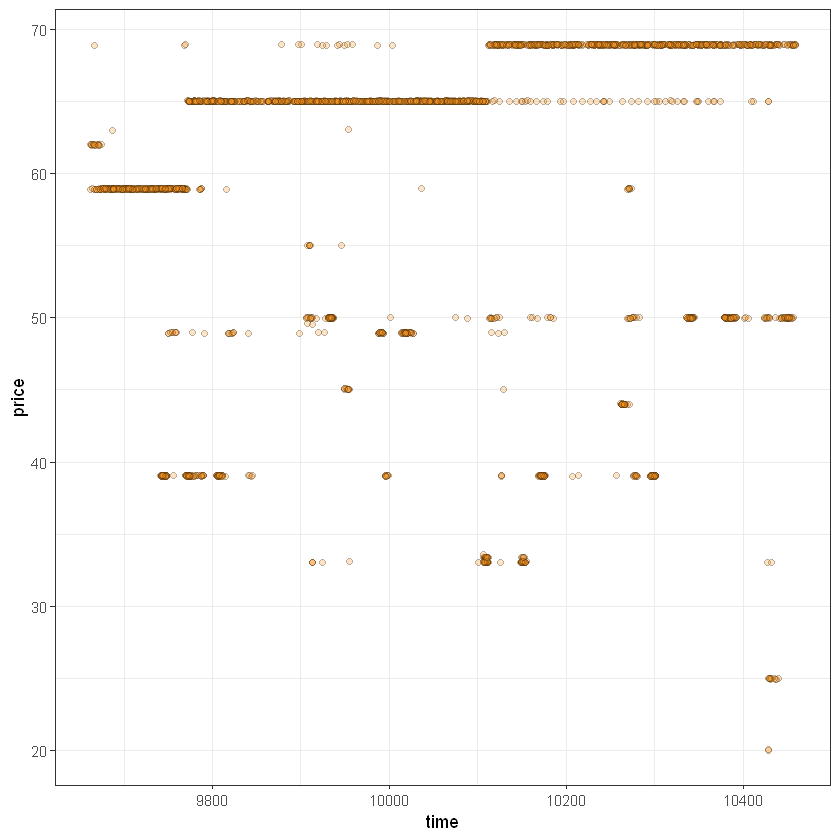

In [30]:
# Create a scatterplot of price vs time.

# This will be an example of a time series plot.

# Resolve overplotting issues by using
# techniques you learned in Lesson 4.

# What are some things that you notice? Model for most commom price increases overtime

ggplot(aes(x = time, y = price), data = yo) +
    geom_jitter(alpha = 1/4, shape = 21, fill = I('#F79420'))

### Sampling Observations / Looking at Samples of Households

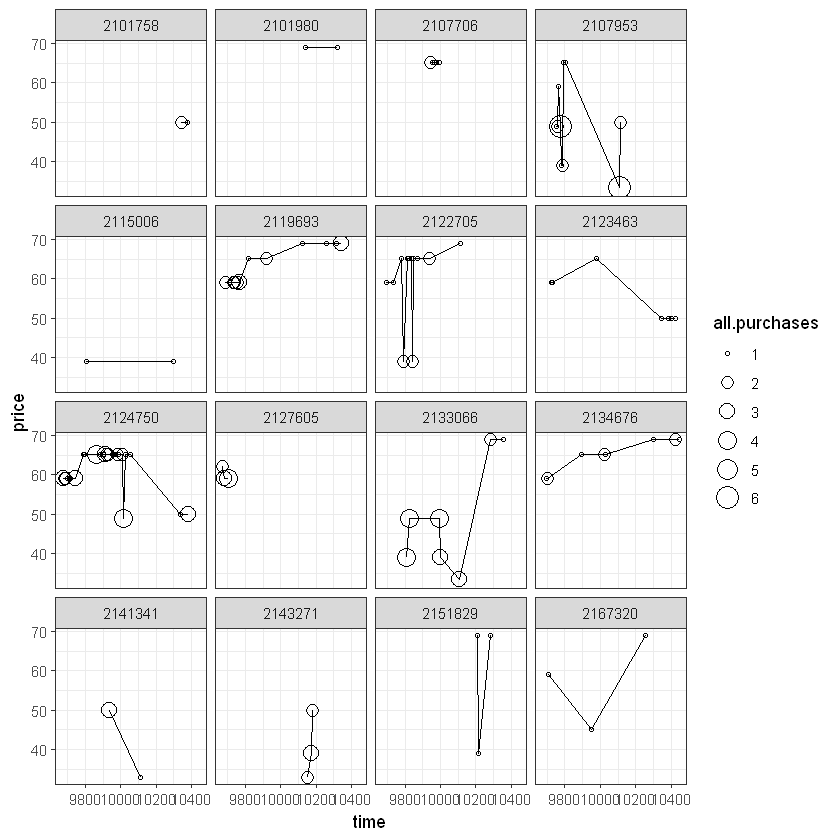

In [31]:
set.seed(4230) # make it reproducible
sample.ids <- sample(levels(yo$id), 16)

ggplot(aes(x = time, y = price),
       data = subset(yo, id %in% sample.ids)) + 
    facet_wrap( ~ id) +
    geom_line() +
    geom_point(aes(size = all.purchases), pch = 1)

### Scatterplot Matrices

In [32]:
install.packages("GGally")

Installing package into 'C:/Users/m_rod/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\m_rod\AppData\Local\Temp\RtmpgrfFJb\downloaded_packages


In [33]:
library(GGally)
theme_set(theme_minimal(20))


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [34]:
set.seed(1836) # set the seed for reproducible results
pf_subset <- pf[, c(2:15)]
names(pf_subset)

[1] "age"                   "dob_day"               "dob_year"             
 [4] "dob_month"             "gender"                "tenure"               
 [7] "friend_count"          "friendships_initiated" "likes"                
[10] "likes_received"        "mobile_likes"          "mobile_likes_received"
[13] "www_likes"             "www_likes_received"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."`stat_bin()` using `bins = 30`. Pick better value with `b

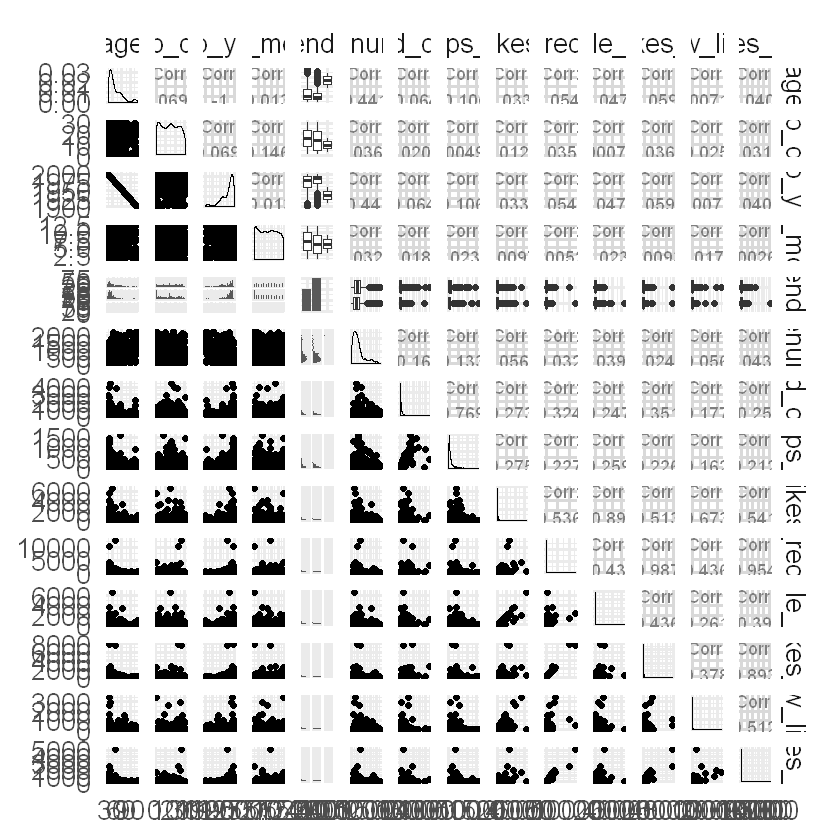

In [35]:
ggpairs(pf_subset[sample.int(nrow(pf_subset), 1000), ])

In [39]:
# Using the same sample of data

set.seed(1836)
mysample <- pf[sample.int(nrow(pf), 1000), -1]

In [ ]:
# 1 - What is the correlation coefficient of friendships initiated and friend count?

with(mysample, cor.test(mysample$friendships_initiated, mysample$friend_count, method = 'pearson'))

In [41]:
# 2 - What is the correlation coefficient of age and mobile likes?

with(mysample, cor.test(mysample$age, mysample$mobile_likes, method = 'pearson'))


	Pearson's product-moment correlation

data:  mysample$age and mysample$mobile_likes
t = -1.5038, df = 998, p-value = 0.133
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.10921866  0.01448828
sample estimates:
        cor 
-0.04754751 


In [43]:
# 3 - What type of plots are below the diagonal of the scatterplot matrix? What types of plots are created for the pairs of variables that include gender?
# Scatterplots are below the diagonal, and categorical variables, like gender, create faceted histograms.

### Heat Map

In [44]:
nci <- read.table('nci.tsv')

# changing the colnames to produce a nicer plot
colnames(nci) <- c(1:64)

In [45]:
nci.long.samp <- melt(as.matrix(nci[1:200, ]))
names(nci.long.samp) <- c('gene', 'case', 'value')
head(nci.long.samp)                      

gene,case,value
1,1,0.300
2,1,1.180
3,1,0.550
4,1,1.140
5,1,-0.265
6,1,-0.070


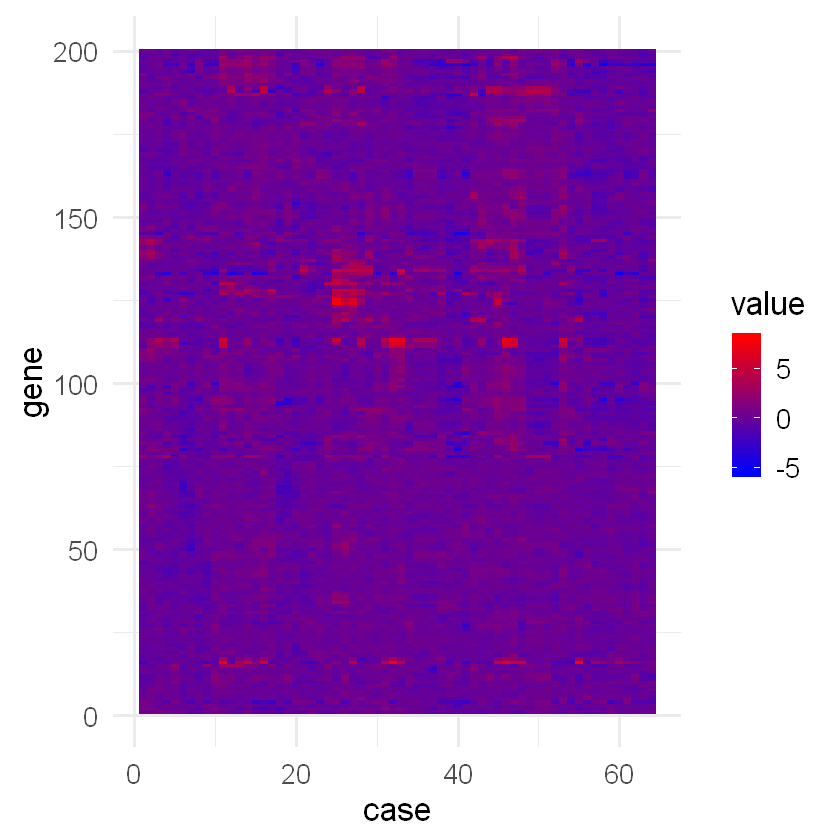

In [46]:
# make the heat map
ggplot(aes(y = gene, x = case, fill = value),
       data = nci.long.samp) +
    geom_tile() +
    scale_fill_gradientn(colors = colorRampPalette(c('blue', 'red'))(100))